In [1]:
from typing import List, Tuple

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True) 

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\tv}{\mathbf{t}}
  \newcommand{\bv}{\mathbf{b}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Im}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$
# Logistic Regression Setup


Before we get into logistic regression, we need to review the concepts regarding *Rosenblatt's perceptron* and *probabilistic classification*. As will soon be seen, logistic regression essentially combines these two ideas to create an algorithm that allows for the direct estimation of the posterior probability $P(y | x)$ by using gradient descent in conjunction with the preceptron learning framework. Additionally, we'll need a loss function to optimize which is where maximum likelihood estimation (MLE) will come into play.

*Note that logistic regression DOES NOT refer to regression, thus the name can be rather deceiving. A better name might have been logistic classification.*

## Table of notation

| Symbol                     | Meaning                     | Symbol    | Meaning                                                          |
|----------------------------|-----------------------------|-----------|------------------------------------------------------------------|
| $\xv$ or $\vec{x}$         | feature/input vector        | $x_i$     | $i$th element of $\xv$                                           |
| $\Xm$                      | input matrix                | $x_{i,j}$ | $i$th row and $j$th column of $\Xm$                              |
| $\yv$ or $\tv$             | labels/targets              | $n$       | number of features or columns 
| $\wv$ or $\mathbf{\theta}$ | weight/parameter vector     | $m$       | number of data samples <br>(also used to refer to the slope) |samples or rows                                   |
| $f$ or $h$                 | hypothesis function <br> (i.e., a model)        | $\hat{\yv}$ <br> $f(\xv {;} \wv)$<br>$h(\xv {;} \wv)$ | predictions <br> y-hat |
| $E$              | error or sum of error (loss)  | $SSE$      | sum of squared error function                                            |
| $MSE$                      | mean squared error| $\nabla$  | gradient (nabla)                                       |
| $\partial$                 | partial derivative          | $\alpha$  | learning rate (alpha)                                  |       
| $J$ | general placeholder for <br>the objective function | $x^T$| transpose of a vector or matrix |
$b$ | bias or y-intercept term | $T$ | Threshold |
$*$| element-wise<br> multiplication | $\cdot$ | dot product|
| $z$<br>$\zv$| value before applying activation function |  $X, Y$ | Random variables |
| $K$| number/set of classes | $k$ | current class|
| $MLE$|  maximum likelihood estimation | $ML$ |  maximum likelihood|
| $MLL$|  maximum log likelihood | $LL$ | log likelihood |
| $L$|  likelihood | $NLL$ | negative log likelihood |
| $g$ | activation function | |

## Perceptron

Recall that the perceptron framework worked by dotting inputs $\Xm$ with the weights $\wv$ to get an output $\zv$. An activation function $g$, specifically the $\sign$ function, is then applied to the continuous outputs $g(\zv)$ which squashes the values into discrete values that act as the class label predictions $\hat{\yv}$.  
<img src="https://sebastianraschka.com/images/faq/logisticregr-neuralnet/schematic.png" width=500 height=500>

With logistic regression this same idea will be applied, however we are going to use different activation function, such as the sigmoid and softmax functions, to squash the continuous outputs $\zv$ into probabilities instead of discrete labels! 

Thus, the order of events for computing probabilistic predictions when using logistic regression will go as follows:

1. First, just like in linear modeling, we take the dot product of our input features $\Xm$ and weights $\wv$ (with a bias/threshold term added). Recall that taking the dot product is the same as multiplying each feature by the corresponding weight and summing! This gives us a continuous value, we'll refer to as $\zv$.

$$
\zv = \Xm \wv
$$

2. Next, an *activation function* $g$ is applied to our continuous values $\zv$. 

$$
\hat{\yv}_\text{probs} = g(\zv)
$$

3. Finally, a *thresholding function* is applied, such as the $\arg \max$, which selects the class label predictions from the probabilities.
$$
\begin{align}
\hat{\yv} &= \arg \max \hat{\yv}_\text{probs} \\ 
&= \arg \max g(\zv)
\end{align}
$$ 

## Probabilistic Classification

Given logistic regression will be outputting probabilities, it is now time to tie in the ideas of probabilistic classification covered in the Naive Bayes module. The first idea to recall is the maximum likelihood (ML) equation for predicting labels. 

$$
\begin{align}
\hat{y}_{ML} &= \arg \max_{k \in \{1,...,K\}} P(\xv \mid y_k) \\
% &= \arg \max_{k \in \{1,...,K\}} \prod_{i=0}^n P(x_i|y_k)
\end{align}
$$
where in this equation
- $K$ is the set of classes or total number of class. For instance, if we had 3 classes then $K$ would contain the set $K \in \{1,2,3\}$
- $\arg \max$, in general terms, refers to the point that maximizes a given function. In relation to our problem, $\arg \max$ refers to selecting the **label** for the class that has the highest probability.

<!-- Further, recall that the $\arg \max$ of the likelihood is equal to the posterior probability as was shown in the Naive Bayes module by deriving ML from Bayes rule:
$$
\begin{align}
\hat{y}_{ML} &= \arg \max_{k \in \{1,...,K\}} P(\xv \mid y_k) \\
\end{align}
$$ -->

On the other hand, the prediction $\hat{y}_{ML}$ is in fact denoting posterior probability: 

$$
\begin{align}
\hat{y}_{ML} &= \arg \max_{k \in \{1,...,K\}} P(y_k \mid \xv)
\end{align}
$$

Going a step further, we can also say that posterior probability $ P(y_k \mid \xv)$ proportional to the likelihood $ P(\xv \mid y_k)$.

$$
\begin{align}
 P(y_k \mid \xv)  &\propto P(\xv \mid y_k)
\end{align}
$$

Here the symbol $\propto$ means the values are proportional to each other but not equal. Meaning, if we applied the $\arg \max$ to both sets of values we would get the same predicted class labels, however the values themselves are not equal.

In the Naive Bayes module the $=$ symbol was often used. However for ML and MAP, it is more accurate to say the ML and MAP equations are proportional to ($\propto$) instead of equivalent ($=$) since the evidence and prior are dropped for ML and the evidence is dropped for MAP. 

# Maximum Likelihood Estimation (MLE)

Maximum likelihood estimation refers to the general process of maximizing the likelihood (which can be done in different ways). In Naive Bayes, we encountered two specific methods for going about MLE. Recall these two methods are maximum likelihood (ML) and maximum log likelihood (MLL).

Once again, we going to apply the general process of MLE, however we will need to take the ideas of ML and MLL and slightly reformulate them to include the weights/parameters $w$ of a model. With basic or categorical Naive Bayes there are no weights/parameters, the goal is to maximize the likelihood computed directly from the data. In the case of logistic regression and other models, we'll need weights in order to predict the posterior probabilities and class labels.

The goal of MLE is to find the posterior probability such that given some data $\xv$ and weights $\wv$, we want the observed labels $y$ to be the most probable for each data sample.

$$
\begin{align}
ML(w) &=  \arg \max_w P(y \mid \xv; w) \\
&= \arg \max_w \prod_{i=1}^{m} P(y_i \mid \xv_i; w)
\end{align}
$$

where in this equation:

- $ML(w)$  denotes the maximum likelihood of the weights/parameters
- $ \arg \max_w$ denotes finding that weights best explain (i.e., predict) the labels $y$ for the given data. 
- $P(y \mid \xv; w)$ denotes the probability of a label $y$ given a data sample $\xv$ parameterized by the weights $w$. The semi-colon notation is used to indicate that the parameters of a model/function that are either learned or will be learned. In this case, since we will be using a logistic regression to predict the probabilities we need to learn some weights $w$ to make said predictions. As we'll soon see, we can reformulate $P(y \mid \xv; w)$ as the output of our model $f(\xv;w)$ where this semi-colon notation makes more sense as the weights $w$ are being used by said model. 


<!-- Notice we are using posterior probability itself $\arg \max_w P(y \mid \xv; w)$ and not the likelihood $\arg \max P(\xv;w \mid y) $ like we saw with Naive Bayes. This will be explained next. -->

*Note, weights are given by this more general lowercase notation $w$ as they can now be either a matrix of shape (number of features, number of classes) or vector of shape (number of features, 1). Also, recall that you will often see the weighs referred to as parameters $\theta$ as well.*



### Hidden likelihood term

You might notice that the goal ML is to find the posterior probability, however the likelihood term $P(\xv; w \mid y)$ is not given in the above $ML(w)$ equation. So where does the likelihood term come into play? 

Recall, in Naive Bayes the likelihood term was a very tangible algorithm because we were able to compute the likelihood using the training data. However, this week the likelihood term will be more abstract. There are a few ways to interpret how the likelihood is implicitly contained with in the MLE idea even though the likelihood isn't always explicitly stated in MLE equations. Below is some interpretations that hopefully provide some more intuition about how the likelihood term is factors into everything.


#### Interpretation 1

First, remember that the likelihood is proportional to the posterior probability as shown by deriving ML from Bayes rule.

$$
P(y_k \mid \xv;w)  \propto P(\xv;w \mid y_k) \\
$$

Thus, you can interpret the two as being substituted in for one-another such that solving for either one will produce the same results when predicting the class labels. Keep in mind, to predict the class labels the $\arg \max$ is required. 

As we'll see, instead of predicting the likelihood as the output, logistic regression will output the probability.

For simplify, you can understand the likelihood and probability as below:
- P(y|x): probability
- P(x|y): likelihood

We use the probability instead as it is more interpretable than the likelihood. Due to this proportionality idea, we can thing simply plug in the probability instead of the likelihood into the $ML(w)$ equation as seen below.

$$
\begin{align}
ML(w) &= \arg \max_w P(\xv;w \mid y) \\
&=  \arg \max_w P(y \mid \xv; w) \\
&= \arg \max_w \prod_{i=1}^{m} P(y_i \mid \xv_i; w)
\end{align}
$$

#### Interpretation 2

While the goal of MLE might be to find the posterior probability, recall we often have to use the likelihood to find it. It turns out that the optimization process through gradient descent acts as an abstraction of the of the likelihood term $ P(\xv;w \mid y_k)$. Recall the likelihood term can be read as the following: *given the labels $y$, find the features $\xv$ and weights $w$ that are most likely to correspond to said class/label*.

This is exactly the idea of the optimization process. Given some class or labels $y$, we want to find the weights $w$ using features $\xv$ that are most likely for the given class. This is the inherit goal when trying to find the optimal weights! Keep in mind, we are actually trying to find the optimal weights that produce optimal predictions for EVERY class. 

## Loss function

Given this idea of MLE, now we need to convert it into a loss function such that we can use gradient descent to solve our classification problem at hand. Remember that the goal of any loss function is to minimize the value of the loss function. Doing so, we'll find weights that minimize total loss. For example, recall that for means square error (MSE) we want to minimize the mean of the squared errors. Turning MLE into a loss function will follow a similar idea. 


First, we start off by just computing the likelihood equation, also called the *likelihood function*. This often referred to as likelihood of the weights $L(w)$. Intuitively this can be interpreted as saying *how likely do the current weights make the observed labels, across ALL data samples, most probable*. Here the higher the value for $L(w)$, the better the weights are doing at predicting the labels across the entire dataset. The equation for $L(w)$ is defined as follows:
$$
\begin{align}
L(w) &=  P(y \mid \xv; w) \\
&= \prod_{i=1}^{m} P(y_i \mid \xv_i; w).
\end{align}
$$

where in this equation:
- $m$ denotes the number of data samples
- $i$ denotes the $i$th data sample
- $P(y_i \mid \xv_i; w)$  denotes the probability of the observed true class label $y_i$ given the current features $\xv_i$ using the weights $w$. 


Notice, once again, the product term is include which can cause numerical instability when multiplying many large or small numbers repeatedly. To fix this we simply take the $\log$ of the likelihood function. The equation is called the *log likelihood function* and is defined as follows:


$$
\begin{align}
LL(w) &=  \log P(y \mid \xv; w) \\
&= \sum_{i=1}^{m}  \log P(y_i \mid \xv_i; w).
\end{align}
$$

Next, recall logistic regression outputs the posterior probability $P(y \mid \xv; w)$. Thus, we can represent $P(y \mid \xv; w)$ as the output of a function $f(\xv; w)$ that takes in data $\xv$ and is parameterized by weights $w$. Keep in mind, $f$ represents the model/algorithm - in this case logistic regression. The following is then true:


$$
P(y \mid \xv; w) = f(\xv; w).
$$

Thus, the $LL(w)$ equation can be written as follows:

$$
\begin{align}
LL(w) &= \log P(y \mid \xv; w) \\
&= \log f(\xv; w) \\
&= \sum_{i=1}^{m}  \log f(\xv; w).
\end{align}
$$

Finally, recall the original goal of log likelihood is to *maximize* the log likelihood. We can convert this maximization problem into a minimization problem by using the *negative log likelihood (NLL)* function given as follows:
$$
\begin{align}
NLL(w) &=  - \log f(\xv; w) \\
&= - \sum_{i=1}^{m}  \log f(\xv; w).
\end{align}
$$

Notice, only a negative sign was added. 

The benefit of using NLL instead of LL is that NLL will return a positive sum where as LL will return a negative sum. This is because the $\log_e$ of any number between 0 and 1 is as always negative. Therefore, a sum of negative numbers multiplied by a negative, produces a positive number. **Thus, in order to find the weights that make the observed labels most probable, we must minimize the NLL function, as seen below.**

$$
\begin{align}
NLL(w) &=  \min - \log f(\xv; w) \\
&= \min - \sum_{i=1}^{m}  \log f(\xv; w)
\end{align}
$$

Lastly, for $NLL(w)$ we can say the smaller the number, the better the weights are doing at predicting the labels across the entire dataset.  

# Logistic Regression 
Recall that in Naive Bayes our goal was to make assumptions about how to model the likelihood $P(\xv \mid y)$ where we could use categorical Naive Bayes, Gaussian Naive Bayes or another distribution to do so. 

For logistic regression, we will now make assumptions about how to directly model posterior probabilities $P(y \mid \xv)$. To do so, we will use the sigmoid and softmax functions. 

## Binary classification: **sigmoid** activation function

The first activation function we can use to estimate $P(y \mid \xv; \wv)$ is the sigmoid activation function. The sigmoid activation function equation is given as follows:

$$
\begin{align}
P(y \mid \xv; \wv) = f(\xv; \wv) &= \frac{1}{1 + e^{-z}} \\
&= \frac{1}{1 + e^{-\wv^\top \xv}} 
\end{align}
$$


For a given data sample's features $\xv$, the sigmoid function simply allows us to squash the continuous output $z$ to values that range from 0 to 1. Can you see where this is going yet? Thus, we can use a binary classification setup where logistic regression with the sigmoid activation outputs a single probability which we say corresponds to the positive class probability.

Note, an alternative way to formulate the sigmoid is as follows:

$$
\begin{align}
P(y \mid \xv; \wv) = f(\xv; \wv) &= \frac{e^z}{1 + e^{z}} \\
&= \frac{e^{\wv^\top \xv}}{1 + e^{\wv^\top \xv}} 
\end{align}
$$

This form $\frac{e^z}{1 + e^{z}}$ is useful to known about when programming as it can prevent overflow errors when $z$ is a very small negative value. Meanwhile, the original sigmoid formulation $\frac{1}{1 + e^{-z}}$ can prevent overflow when $z$ is a very large positive value.

Below is the sigmoid equation defined as the `sigmoid()` function.

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Additionally, the below function `plot_sigmoid()` plots the sigmoid function.

Here we can say all values approximately less than or equal to 0.5 are assigned the label of 0 (i.e., negative class) and all values approximately greater than 0.5 are assigned the label 1 (i.e., positive class). 

Further, the sigmoid activation function is essentially just a smoothed sign activation function. Recall we used the sign activation function with Rosenblatt's perceptron!

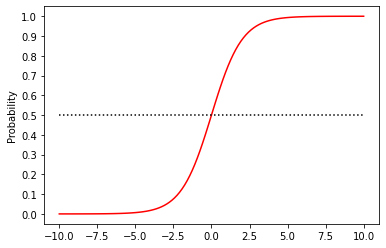

In [ ]:
def plot_sigmoid():

    x_values = np.linspace(-10, 10, 120)
    y_values = sigmoid(x_values)
    plt.plot(x_values, y_values, 'r')
    plt.hlines(y=.5, xmin=x_values.min(), xmax=x_values.max(), 
               colors='black', linestyles='dotted')
    plt.yticks(np.arange(0, 1+.1, .1))
    plt.ylabel("Probability")
    
plot_sigmoid()
plt.show()

### **Negative log likelihood loss function**
For binary classification, we can formulate the NLL loss function as an indicator function where $y \in [0, 1]$ as follows:


$$
NLL(\wv) =\begin{cases}
    & -\log(f(\xv;\wv)) \, \text{if} \, y = 1\\
    & -\log(1- f(\xv;\wv)) \ \text{if} \ y = 0\\
\end{cases}
$$

where $P(y \mid \xv; \wv) = f(\xv; \wv)$. Sadly, formulating NLL loss function as an indicator function isn't very useful for optimization with gradient descent as the derivative can NOT be computed from the indicator function. Instead we can actually turn said indicator function into an actual equation.

We can reformulate the NLL loss function into an actual equation by utilizing the [Bernoulli probability mass function equation](https://en.wikipedia.org/wiki/Bernoulli_distribution). Without applying the $\log$, we get the following equation:


$$
NLL(\wv) = - \prod_{i=1}^{m} f(\xv_i;\wv)^{y_i} (1 - f(\xv_i;\wv))^{1 - y_i}     
$$

Applying the $\log$, we then get the following NLL loss function for binary classification:
$$
NLL(\wv) = - \sum_{i=1}^{m} {y_i}\log[f(\xv_i;\wv)] + ({1 - y_i})\log[1 - f(\xv_i;\wv)]     
$$

Finally, we can compute the *average* loss for NLL by simply dividing by $m$ or the number of data samples.

$$
NLL(\wv) = - \frac{1}{m}\sum_{i=1}^{m} {y_i}\log[f(\xv_i;\wv)] + ({1 - y_i})\log[1 - f(\xv_i;\wv)] 
$$

Often times, like with MSE, it is better to compute the mean of a loss function instead simply summing. Thus, below we define the binary NLL loss/loss function using the `binary_nllloss()` function to compute the average loss. Recall, loss functions measure how well a model/algorithm are performing. 

In [ ]:
def binary_nll(y, pred_probs, epsilon=1e-4):
    pos_class_probs = pred_probs+epsilon
    neg_class_probs = 1-pred_probs+epsilon

    losses = y*np.log(pos_class_probs) + (1-y)*np.log(neg_class_probs)
    avg_loss = -np.sum(losses) / len(y)
    
    
    return avg_loss

### Computing negative log likelihood gradient

Since the sigmoid activation function is a smoothed version of the sign function, we can actually compute the gradient of the sigmoid activation! This means we can compute the gradient of our loss function. Thus, we can use the gradient of the NLL loss function with gradient descent to learn the weights that make the observed labels most probable.

We can learn the best weights using any form of gradient descent such as online, mini-batch, or batch gradient descent. The below equation computes the batch gradient as we'll be using batch gradient in this module. 

$$
\begin{align}
\nabla NLL(\wv) &= - \sum_{i=1}^{m} (f(\xv_i;\wv) - y_i)\xv_i \\
&= - \Xm^\top \big (f(\Xm;\wv) - \yv \big ) 
\end{align}
$$


Extending to mini-batch and online is simply done by indexing an mini-batch or single sample at a time. For mini-batch gradient descent recall that you would need to compute the average gradient!

The weight update using batch gradient for NLL is also as follows:
$$
\begin{align}
\wv_{k+1} &= \wv_{k} + \alpha \nabla NLL(\wv_k)\\
&=  \wv_{k}- \alpha \big [ \Xm^\top \big (f(\Xm;\wv) - \yv \big ) \big ]
\end{align}
$$


*Note, often times you will see people derive and the log likelihood instead of the negative log likelihood. This produces the gradient that looks like the following: $ \Xm^\top \big (\yv - f(\Xm;\wv) \big )$ where the order of subtraction is reversed.*

### Deriving negative log likelihood
For those interested in how to derive the NLL loss function we can use the chain rule (for derivatives) to compute the derivatives of NLL one at a time. (Note, we'll see the chain rule appear again for neural networks!)
 
$$
\frac{\partial NLL(\wv)}{\partial \wv} = \frac{\partial NLL(\wv)}{\partial f(\xv;\wv)}  \frac{\partial f(\xv;\wv)}{\partial z}  \frac{\partial \zv}{\partial \wv}
$$
<hr>

Below is the derivative of the NLL equation with respect to $f(\xv;\wv)$. All we do is apply the derivative of the [natural log rule](https://web.ma.utexas.edu/users/m408n/m408c/CurrentWeb/LM3-6-2.php).

$$
\begin{align}
NLL(\wv) &= -y\log[f(\xv;\wv)] - (1 - y)\log[1 - f(\xv;\wv)] \\
\frac{\partial NLL(\wv)}{\partial f(\xv;\wv)} &= -\frac{y}{f(\xv;\wv)} + \frac{1-y}{1-f(\xv;\wv)} \tag{1}
\end{align}
$$

<hr>



Next, let's check the second item. The sigmoid function can be written as:
$$
f(\xv; \wv) = \frac{1}{1 + e^{-z}} 
$$
Then, we can calculate the derivative of the sigmoid function with respect to $z$. If you are interested in more details, [check here](https://math.stackexchange.com/questions/78575/derivative-of-sigmoid-function-sigma-x-frac11e-x).
$$
\begin{align}
\frac{\partial f(\xv;\wv)}{\partial z} &= \big( \frac{1}{1 + e^{-z}} \big) \big( 1- \frac{1}{1 + e^{-z}} \big) \\ 
&=  f(\xv; \wv ) \big( 1- f(\xv; \wv) \big) \tag{2}
\end{align}
$$

<hr>

Below is the derivative of $z$ using matrix derivative:

$$
\begin{align}
z &= \wv^\top \xv \\
\frac{\partial \zv}{\partial \wv} &= \xv \tag{3}
\end{align}
$$

<hr>

Applying the chain rule, combinbing Eqs (1)-(3), we get the following:


$$
\begin{align}
\frac{\partial NLL(\wv)}{\partial \wv} &= \frac{\partial NLL(\wv)}{\partial f(\xv;\wv)}  \frac{\partial f(\xv;\wv)}{\partial z}  \frac{\partial \zv}{\partial \wv} \\
&= \bigg [ - \frac{y}{f(\xv;\wv)} + \frac{1-y}{1-f(\xv;\wv)} \bigg ]   f(\xv; \wv ) \big( 1- f(\xv; \wv) \big)  \xv \\
&= \big [-y(1- f(\xv; \wv)) + (1- y) f(\xv; \wv ) \big ]  \xv \\ 
&= \big [-y + yf(\xv; \wv) +  f(\xv; \wv )- yf(\xv; \wv )) \big ]  \xv \\
&= [-y +  f(\xv; \wv )]  \xv \\ 
&= [f(\xv; \wv ) - y]  \xv \tag{4}
\end{align}
$$

## Code
Now, let's go over the code and work with some toy data. 

### Utility functions

Below are some utility functions for drawing the decision boundary given by the `plot_line_decision_boundary()` and plotting the toy data give by the `plot_2D_data()` function.

In [ ]:
def plot_line_decision_boundary(
    X: np.ndarray, 
    y: np.ndarray,
    w: np.ndarray,
    xlabel: str = '',
    ylabel: str = '',
    includes_bias:bool = False,
    class_names: dict = None
):
    if len(w) > 3:
        raise ValueError("To plot boundary requires at most 3 weights")
        
    # Create decision boundary
    line_X = np.linspace(np.min(X[:, 1])-1, np.max(X[:, 1])+1, len(X)).reshape(-1,1)
    slope = -(w[0] / w[2]) / (w[0] / w[1])
    y_intercept = -w[0]/ w[2]
    decision_boundry = slope * line_X + y_intercept
    
    # plot data
    plot_2D_data(
        X, 
        y,
        xlabel=xlabel,
        ylabel=ylabel,
        includes_bias=includes_bias, 
        class_names=class_names)
    
    plt.plot(line_X, decision_boundry)
    plt.ylim(np.min(X[:, 2])-1, np.max(X[:, 2])+1)
    plt.xlim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
    plt.legend()
    
def plot_2D_data(
    X: np.ndarray, 
    y: np.ndarray,
    xlabel: str = '',
    ylabel: str = '',
    includes_bias=False, 
    class_names=None
):
    if class_names is None:
        class_names = {}
        
    class_labels = np.unique(y)
            
    if includes_bias:
        col_1, col_2 = 1, 2
    else:
        col_1, col_2 = 0, 1
    
    for l in class_labels:
        class_locs = np.where(y == l)[0]
        class_X = X[class_locs]
        class_name = class_names.get(l, f'class {l}')

        plt.scatter(class_X[:, col_1],
                    class_X[:, col_2], 
                    label=class_name)

    # Plot data
    plt.xlim([np.min(X[:, col_1])-.5, np.max(X[:, col_1])+.5])
    plt.ylim([np.min(X[:, col_2])-.5, np.max(X[:, col_2])+.5])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

Further, the function `nonseparable_linear_data()` creates some non-separable linear data.

X shape: (100, 3)
y shape: (100, 1)


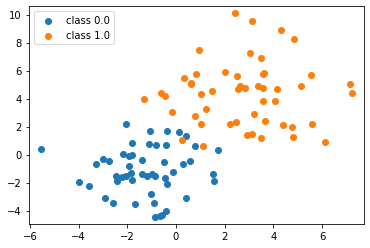

In [ ]:
def nonseparable_linear_data(C1_size=50, C2_size=50):
    mu1 = [-1, -1]
    cov1 = np.eye(2) * 3

    mu2 = [3, 4]
    cov2 = np.eye(2) * 5
    rng = np.random.RandomState(42)
    C1 = rng.multivariate_normal(mu1, cov1, C1_size)
    C2 = rng.multivariate_normal(mu2, cov2, C2_size)
    
    y = np.ones(len(C1)+len(C2))
    y[:len(y)//2] = 0
    bias = np.ones([C1_size+C2_size, 1])

    X = np.vstack([C1, C2])
    X = np.hstack([bias, X])
    return X, y.reshape(-1, 1)

X, y = nonseparable_linear_data()
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
plot_2D_data(X, y, includes_bias=True)
plt.show()

### Binary linear regression

Now we define the  `batch_gradient_descent()` function which uses gradient descent for finding the best weights. The `batch_gradient_descent()` functions works as follows.

First, we start off by defining the random weights `w` as always. However, notice that shape of the weights `w` is set to `(X.shape[1], 1)`. Doing so ensures the weights are a 2D array as this is simply another way of doing so without using the `reshape()` method.

```Python
rng = np.random.RandomState(seed)
w = rng.rand(X.shape[1], 1)
```

Next, we simply loop over the epochs as we are doing batch gradient descent which means we update the weights using every data samples at least once. We also define the `epoch_losses` list to hold the average loss over all data samples for each epoch.

```Python
epoch_losses = []
for e in range(epochs):
```

We can then compute the continuous predictions `z` and pass them to the sigmoid function. Notice, we use ALL the data `X` as we are performing batch gradient descent.

```Python
z = X @ w
probs = sigmoid(z)
```

Using the probabilities `prob`, we then compute the gradient of the NLL loss function. Notice that we use the dot product `@` which computes the gradient for each feature and sums across samples automatically. For instance, if `X.T`had shape (2,100) and `probs - y` had shape (100 , 1) then the gradient would be (2, 1). We then divide by the total number of samples to compute the average gradient

*Note, before we broke the summing and dividing into separate parts as we used element wise multiplication. Using the dot product we can compute the gradients for every data sample and compute the sum for each feature at the same time!*

```Python
avg_gradient = (X.T @ (probs - y)) / len(y)
```
Next we update the weights using the true gradient.

```Python
w -= alpha * avg_gradient
```
Lastly, we compute the NLL loss for all data samples and then compute the total loss and store it in a list.
```Python
avg_loss = binary_nll(y, probs)
epoch_losses.append(avg_loss)
```

In [ ]:
def batch_gradient_descent(X, y, alpha, epochs=1, seed=0):
    rng = np.random.RandomState(seed)
    w = rng.rand(X.shape[1], 1)
    
    epoch_losses = []
    for e in range(epochs):
        z = X @ w
        probs = sigmoid(z)
        avg_gradient = (X.T @ (probs - y)) / len(y)
        w -= alpha * avg_gradient
        
        # Pay attention to the order of the args!
        avg_loss = binary_nll(y, probs)
        epoch_losses.append(avg_loss)
        
    return epoch_losses, w

In [ ]:
X, y = nonseparable_linear_data()
loss, w = batch_gradient_descent(
    X=X, 
    y=y,
    alpha=.5, 
    epochs=200
)

Below we can see our weights.

In [ ]:
w

array([[-2.62815356],
       [ 1.32325989],
       [ 1.50445294]])

This graph displays the average loss for each epoch. Notice as training goes on our loss slowly drops. Plotting the average loss for each epoch is typically referred to as the "learning curve" of the training. [Learning curves](https://en.wikipedia.org/wiki/Learning_curve_(machine_learning)) help us to visualize the learning process overtime. 

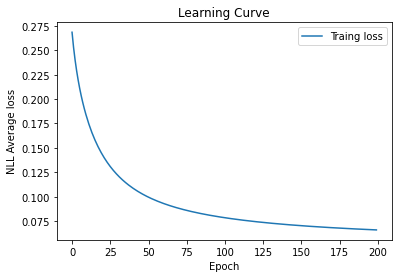

In [ ]:
plt.plot(loss, label='Traing loss')
plt.title("Learning Curve")
plt.ylabel("NLL Average loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

If we plot the decision boundary using the learned weights we can see that logistic regression has learned to separate the data.

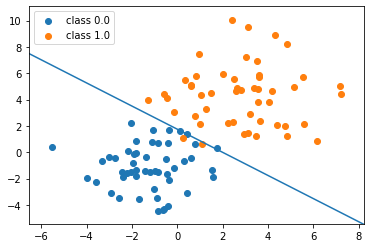

In [ ]:
plot_line_decision_boundary(X, y, w, includes_bias=True)

Next, we can make predictions using the learned weights `w`. Recall that in order to determine if a sample is a positive or negative sample we simply use a 0.5 threshold. 

This means, if the predicted positive probability is above 0.5 then it will be a positive sample (label 1) and if it is less than or equal to 0.5 it will be a negative sample (label 0).

We can simply check for this using the following code. Here `False` indicates the positive probability is below the threshold and `True` indicates it is above the threshold.

In [ ]:
z = X @ w
pos_probs = sigmoid(z)
(pos_probs > 0.5)

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

Wrapping the boolean function in `np.uint8` converts the boolean array into a array of integers where `False` is assigned the value of 0 (i.e., a negative sample) and `True` is assigned the value 1 (i.e., a positive sample).

In [ ]:
 np.uint8(pos_probs > 0.5)

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

Putting all this into the `sigmoid_predict()` function then let's us make predictions.

In [ ]:
def sigmoid_predict(X, w):
    z = X @ w
    pos_probs = sigmoid(z)
    y_hat = np.uint8(pos_probs > 0.5)
    return y_hat.reshape(-1,1)

In [ ]:
y_hat = sigmoid_predict(X, w)

In [ ]:
y_hat.flatten()

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_hat)

0.97

Lastly, we can compute the probabilities both for the positive and negative classes. To compute the negative probabilities we simply compute one minus the positive probabilities.

In [ ]:
def sigmoid_probabilities(X, w):
    z = X @ w
    pos_probs = sigmoid(z)
    neg_probs = 1 - pos_probs
    probs = np.hstack([neg_probs, pos_probs])
    return probs

In [ ]:
probs = sigmoid_probabilities(X, w)
probs

array([[0.9907854 , 0.0092146 ],
       [0.50067503, 0.49932497],
       [0.99864507, 0.00135493],
       [0.45924347, 0.54075653],
       [0.99404815, 0.00595185],
       [0.99956145, 0.00043855],
       [0.99994917, 0.00005083],
       [0.99998107, 0.00001893],
       [0.99905025, 0.00094975],
       [0.99998656, 0.00001344],
       [0.9361353 , 0.0638647 ],
       [0.99987828, 0.00012172],
       [0.99836508, 0.00163492],
       [0.99918776, 0.00081224],
       [0.99949608, 0.00050392],
       [0.88166618, 0.11833382],
       [0.99973697, 0.00026303],
       [0.9988327 , 0.0011673 ],
       [0.99995824, 0.00004176],
       [0.99966027, 0.00033973],
       [0.9650002 , 0.0349998 ],
       [0.9985071 , 0.0014929 ],
       [0.99997791, 0.00002209],
       [0.97717906, 0.02282094],
       [0.99990508, 0.00009492],
       [0.99671967, 0.00328033],
       [0.99556349, 0.00443651],
       [0.66063923, 0.33936077],
       [0.99972129, 0.00027871],
       [0.89609425, 0.10390575],
       [0.

# Extending Logistic Regression (**Softmax** Regression)

We can extend logistic regression to multi-class classification for linearly separable data by modeling the observed labels using a new activation function called the [softmax activation function](https://deepai.org/machine-learning-glossary-and-terms/softmax-layer). This form of logistic regression is often referred to as *softmax regression*.

**Multi-class logistic regression with the softmax function is a generalization of binary logistic regression with the sigmoid function**. 
In short:
- Binary classification: Sigmoid function
- Multi-class classification: Softmax function

Notice, the softmax formula is very similar to the sigmoid function. When performing binary classification with the softmax function acts exactly the same as if the sigmoid activation function was being used! 

The softmax activation function equation is given as follows, at the signle-sample level:

$$
\begin{align}
P(y \mid \xv; \wv) = f(\xv; \wv) &= \frac{e^{\zv_i}}{\sum_{k=1}^K e^{\zv_k}}
\end{align}
$$

where in this equation
- $K$ the number of classes.
- $i$/$k$ refers to **the $i$th/$k$th element in the vector $\zv$** (i.e., $i$th/$k$th class or column). 
- $\zv$ is a continuous vector which contains the continuous predictions from the model. When using batch or mini-batches $\zv$ will be a matrix $\Zm$ with shape (number of features, number of classes).
- $e^{\zv_i}$ exponentiates each element in $\zv$. The exponential $e$ is used to prevent negative values. Further, values will be very small if the input is negative, and very large if the input is large. However, simply using $e$ means the value range is still not fixed between (0, 1) which is what is required of a probability.
- $\sum_{k=1}^K e^{\zv_k}$ is the normalizing term which ensures all values in $e^\zv$ sum to 1. Meaning, the range of all values will be between (0, 1) and sum to 1. To do so, the sum over all elements in $e^\zv$ is computed.

Below is the code for the softmax activation function. However, note it is different from the given equation. The main difference is that we are subtracting max of each data sample over the columns from `z`. We do this to make the softmax function more numerically stable. See this [post](https://stackoverflow.com/a/49212689) to learn more!

In [ ]:
def softmax(z):
    z = z - np.max(z, axis=-1, keepdims=True)
    e_z = np.exp(z)
    denominator = np.sum(e_z, axis=-1, keepdims=True)

    return e_z / denominator

Further, the below code shows how the `softmax` function works both on vectors and matricies.

In [ ]:
rng = np.random.RandomState(0)
rnd_data = rng.rand(1, 3)
rnd_data

array([[0.5488135 , 0.71518937, 0.60276338]])

In [ ]:
softmax_probs = softmax(rnd_data)
softmax_probs

array([[0.30898065, 0.36491138, 0.32610797]])

Notice, the sum is near one but isn't exactly 1. This is most likely due floating point imprecisions.

In [ ]:
np.sum(softmax_probs)

0.9999999999999998

In [ ]:
rng = np.random.RandomState(0)
rnd_matrix_data = rng.rand(10, 3)
rnd_matrix_data

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276],
       [0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985],
       [0.77815675, 0.87001215, 0.97861834],
       [0.79915856, 0.46147936, 0.78052918],
       [0.11827443, 0.63992102, 0.14335329],
       [0.94466892, 0.52184832, 0.41466194]])

In [ ]:
softmax_matrix_probs = softmax(rnd_matrix_data)
softmax_matrix_probs

array([[0.30898065, 0.36491138, 0.32610797],
       [0.33421115, 0.29605481, 0.36973403],
       [0.23434743, 0.36907156, 0.396581  ],
       [0.27316453, 0.41090326, 0.31593222],
       [0.3291452 , 0.47062004, 0.20023476],
       [0.24735616, 0.23134691, 0.52129693],
       [0.30137067, 0.33036442, 0.36826491],
       [0.37106203, 0.2647246 , 0.36421337],
       [0.26952757, 0.45409994, 0.27637249],
       [0.44567311, 0.29200331, 0.26232358]])

In [ ]:
np.sum(softmax_matrix_probs, axis=1, keepdims=True)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

### Negative log likelihood loss function

By using the softmax we can generalize the NLL loss function for multiple classes. This generalization is also referred to as the [*cross-entropy*](https://en.wikipedia.org/wiki/Cross_entropy) loss function. The generalized NLL loss function is given as follows:

$$
NLL(\wv) = - \sum_{i=1}^{m} {\yv_i} * \log[f(\xv_i;\wv)]     
$$

In the sigmoid function for binary classification, $\yv_i \in \{0, 1\}$; for softmax function for multiclass situation, $\yv_i \in \{0, 1, \cdots, N\}$ where N denotes the number of all classes. 

<!-- - Another difference between sigmoid and softmax is that the function $f(\xv_i;\wv)$ is differnet.  -->

<!-- The idea being that we compute the loss for each sample with respect to the observed true class label and the predicted probability for the observed true class label ONLY! -->

<!-- Remember, we were doing exactly the same thing with the binary version of NLL, however we only had the positive class probabilities and we derived the negative probabilities using the positive class probabilities. Now, we have access to the probabilities for ALL classes thanks to the softmax function! -->

Recall we can easily compute the mean NLL loss by dividing by $m$ data samples as follows:

$$
NLL(\wv) = - \frac{1}{m}\sum_{i=1}^{m} {\yv_i} * \log[f(\xv_i;\wv)].    
$$

Below the `nll()` function contains the code for the mean of the generalized NLL loss function.

In [ ]:
def nll(y, pred_probs, epsilon=1e-5):
    pred_probs = pred_probs + epsilon
    
    loss = y * np.log(pred_probs)
    cost = -np.sum(loss)
    
    return cost

#### One-hot encoding 
 In order for the NLL to work as intended, we first need to make sure that the labels $y$ have been converted in to one hot encodings. Recall that we are multiplying $y$ by $\log[f(\xv_i;\wv)]$ where $f(\xv_i;\wv)$ outputs probabilities for each class.
 
 
By converting the labels into a one-hot encoding this ensures that the loss for each sample is computed with respect to the observed true class label and the predicted probability for the observed true class label ONLY. This is because a given label's one-hot encoding will contain the value 1 only for the column of the corresponding ground truth class! This means the rest of the class columns will be zero causing their loss values to not be considered as 0 multiplied by anything is zero.

For example, using a single data sample let's assume the true class label $y_i$ is 1 and the possible classes are $\{0,1,2\}$, thus the one-hot encoding is $[0, 1, 0]$. Further, let's say the predicted probabilities output by model $f$ are $f(\xv_i;\wv) = [ 0.2, 0.7, 0.1]$. After taking argmax operation, $[ 0.2, 0.7, 0.1]$ becomes $[0, 1, 0]$. Thus, the NLL loss function would look as follows:


\begin{align}
  \begin{bmatrix}
            0, 1, 0 \\
  \end{bmatrix} * \log \big (
  \begin{bmatrix}
      0.2, 0.7, 0.1
  \end{bmatrix} \big ).
\end{align}

which is the same as saying the following:

$$
1 * \log(0.7).
$$

Below the `onehot()` functions converts a vector of labels into matrix of one-hot encodings using NumPy. 

In [ ]:
def onehot(y):
    n_values = np.max(y) + 1
    oh = np.eye(n_values)[y.flatten()]
    return oh

In [ ]:
labels = np.array([1,0,2,4,3,1])
labels

array([1, 0, 2, 4, 3, 1])

In [ ]:
labels_oh = onehot(labels)
labels_oh

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

Below is the same one-hot encoding but converted into a DataFrame to increase readability. Notice how the 1st column corresponds to label 0,  the 2nd column corresponds to label 1, and so on. Keep in mind, the rows corresponds to the data samples.

In [ ]:
label_names = [f"Label {l}"for l in np.unique(labels)]

labels_oh_df = pd.DataFrame(labels_oh, columns=label_names)
labels_oh_df

,Label 0,Label 1,Label 2,Label 3,Label 4
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0


## Code
Now, let's go over the code and work with some toy data. 

### Utility functions

Below are some utility functions. The `plot_fill_decision_boundary()` function is for coloring the decision boundary.

In [ ]:
def plot_fill_decision_boundary(
    predict, 
    X: np.ndarray, 
    y: np.ndarray,
    w: np.ndarray,
    xlabel: str = '',
    ylabel: str = '',
    includes_bias: bool = False,
    class_names=None):
               
    if includes_bias:
        col_1, col_2 = 1, 2
    else:
        col_1, col_2 = 0, 1
        
    # Generate fake data to cover entire space of our input features X
    buffer = .5
    x_min, x_max = X[:, col_1].min() - buffer, X[:, col_1].max() + buffer
    y_min, y_max = X[:, col_2].min() - buffer, X[:, col_2].max() + buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    bias = np.ones(xx.ravel().shape)
    fake_data = np.c_[bias, xx.ravel(), yy.ravel()].reshape(-1,3)

    # Make prediction
    y_hat = predict(fake_data, w)

    # Plot
    plt.contourf(xx, yy, y_hat.reshape(xx.shape))
 
    plot_2D_data(
        X, 
        y,
        xlabel=xlabel,
        ylabel=ylabel,
        includes_bias=includes_bias, 
        class_names=class_names)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

Further, the function `multi_class_data()` creates multi-class non-separable linear data.

X shape: (1000, 3)
y shape: (1000, 1)


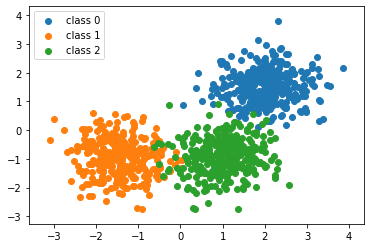

In [ ]:
from sklearn.datasets import make_blobs

def multi_class_data(
    n_samples: int = 1000, 
    balance: List = None,
    seed: int = 42
) -> List[np.ndarray]:
    X, y = make_blobs(n_samples=1000,
                      random_state=seed,  
                      centers=[[2, 1.5], [-1.5, -1], [1, -1]],
                      cluster_std=0.6)
    
    # Add bias
    X = np.hstack([np.ones([len(X), 1]), X])
    return X, y.reshape(-1, 1)
    
X, y = multi_class_data()
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
plot_2D_data(X, y, includes_bias=True)
plt.show()

### Multi-class logistic regression

Below is the function `batch_gradient_descent()` for finding the optimal weights using the softmax and generalized NLL. There are three major differences that need to be pointed out.

First, notice that when defining the random weights `w` the shape of the weights `w` is set to `(X.shape[1], y.shape[1])`. This is because the weight matrix now needs to have a column for EACH class in our data. This means the `w` has the shape (number of features, number of classes). Recall we do this because we want to output a probability for EACH class!

```Python
rng = np.random.RandomState(seed)
w = rng.rand(X.shape[1], y.shape[1])
```

Second, notice that we are now using the softmax activation function `softmax()` to compute the `probs` instead of the sigmoid. 

```Python
probs = softmax(z)
```

Third, we are now using the generalized NLL loss function `nll()`.

```Python
avg_loss = nll(y, probs)
epoch_losses.append(avg_loss)
```

In [ ]:
def batch_gradient_descent(X, y, alpha, epochs=1, seed=0):
    rng = np.random.RandomState(seed)
    w = rng.rand(X.shape[1], y.shape[1])
    
    epoch_losses = []
    for e in range(epochs):
        z = X @ w
        probs = softmax(z)
        avg_gradient = (X.T @ (probs - y)) / len(y)
        w -= alpha * avg_gradient
        
        avg_loss = nll(y, probs)
        epoch_losses.append(avg_loss)
        
    return epoch_losses, w

In [ ]:
# Generate data
X, y = multi_class_data()
# Convert labels to one-hots
y_oh = onehot(y)
# learn weights
loss, w = batch_gradient_descent(
    X=X, 
    y=y_oh,
    alpha=.1, 
    epochs=100)

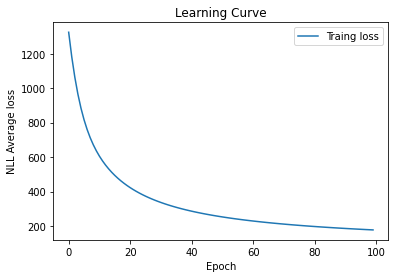

In [ ]:
plt.plot(loss, label='Traing loss')
plt.title("Learning Curve")
plt.ylabel("NLL Average loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
def softmax_predict(X, w):
    z = X @ w
    probs = softmax(z)
    y_hat = np.argmax(probs, axis=1)
    return y_hat.reshape(-1,1)

In [ ]:
y_hat = softmax_predict(X, w)
y_hat.shape

(1000, 1)

In [ ]:
accuracy_score(y, y_hat)

0.973

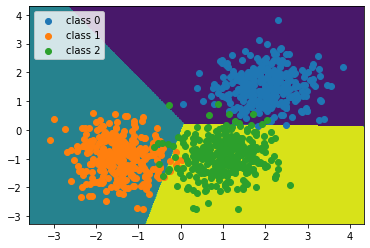

In [ ]:
plot_fill_decision_boundary(softmax_predict, X, y, w, includes_bias=True)

In [2]:
def softmax_probabilities(X, w):
    z = X @ w
    probs = softmax(z)
    return probs

In [3]:
probs = softmax_probabilities(X, w)
probs

NameError: name 'X' is not defined

In [4]:
np.log([0.1,0.5,0.4])

array([-2.30258509, -0.69314718, -0.91629073])